<a href="https://colab.research.google.com/github/Anish32/wheather-prediction/blob/main/wheather_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, RFE, SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [116]:
df = pd.read_csv('/content/weather_prediction_dataset.csv')
df1 = pd.read_csv('/content/weather_prediction_bbq_labels.csv')

In [117]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [118]:
df1.head()

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [119]:
merged_data = pd.merge(df, df1, on='DATE')
merged_data .head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,False,False,False,False,False,False,False,False,False,False
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,False,False,False,False,False,False,False,False,False,False
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,False,False,False,False,False,False,False,False,False,False
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,False,False,False,False,False,False,False,False,False,False
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,False,False,False,False,False,False,False,False,False,False


In [120]:
missing_counts = merged_data.isna().sum().sum()
missing_counts

np.int64(0)

In [121]:
merged_data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,False,False,False,False,False,False,False,False,False,False
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,False,False,False,False,False,False,False,False,False,False
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,False,False,False,False,False,False,False,False,False,False
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,False,False,False,False,False,False,False,False,False,False
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,False,False,False,False,False,False,False,False,False,False


In [122]:
oslo_columns = merged_data.filter(like='OSLO')

X = pd.concat([merged_data[['DATE', 'MONTH']], merged_data[oslo_columns.columns]], axis=1)

X.drop('OSLO_BBQ_weather', axis=1, inplace=True)

y = merged_data['OSLO_BBQ_weather']

X

,DATE,MONTH,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max
0,20000101,1,7,0.9,5.1,0.94,1.0130,0.04,0.60,0.0,-5.0,-8.6,-3.2
1,20000102,1,6,1.9,5.7,0.94,1.0076,0.11,0.00,1.6,-0.8,-6.7,2.4
2,20000103,1,6,1.7,8.7,0.88,1.0016,0.04,0.00,0.0,1.2,-1.1,3.8
3,20000104,1,1,3.4,11.8,0.58,0.9982,0.13,0.00,5.3,2.1,-0.5,5.1
4,20000105,1,8,1.2,5.7,0.94,1.0055,0.05,0.06,0.0,-0.7,-4.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,4,1.2,5.3,0.88,0.9954,0.16,0.00,4.8,-10.1,-11.7,-5.9
3650,20091229,12,1,0.7,4.1,0.88,1.0060,0.16,0.00,4.9,-13.1,-15.1,-9.1
3651,20091230,12,0,0.6,3.5,0.85,1.0094,0.16,0.00,4.4,-15.7,-17.5,-11.8
3652,20091231,12,5,0.6,2.4,0.88,1.0062,0.11,0.02,1.7,-10.8,-16.8,-8.9


In [123]:
merged_data[oslo_columns.columns]

,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,OSLO_BBQ_weather
0,7,0.9,5.1,0.94,1.0130,0.04,0.60,0.0,-5.0,-8.6,-3.2,False
1,6,1.9,5.7,0.94,1.0076,0.11,0.00,1.6,-0.8,-6.7,2.4,False
2,6,1.7,8.7,0.88,1.0016,0.04,0.00,0.0,1.2,-1.1,3.8,False
3,1,3.4,11.8,0.58,0.9982,0.13,0.00,5.3,2.1,-0.5,5.1,False
4,8,1.2,5.7,0.94,1.0055,0.05,0.06,0.0,-0.7,-4.0,0.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3649,4,1.2,5.3,0.88,0.9954,0.16,0.00,4.8,-10.1,-11.7,-5.9,False
3650,1,0.7,4.1,0.88,1.0060,0.16,0.00,4.9,-13.1,-15.1,-9.1,False
3651,0,0.6,3.5,0.85,1.0094,0.16,0.00,4.4,-15.7,-17.5,-11.8,False
3652,5,0.6,2.4,0.88,1.0062,0.11,0.02,1.7,-10.8,-16.8,-8.9,False


In [124]:
import numpy as np

correlations = X.corrwith(y)

correlations = correlations.abs()

sorted_correlations = correlations.sort_values(ascending=False)

print(sorted_correlations)

OSLO_global_radiation    0.606420
OSLO_temp_max            0.588684
OSLO_temp_mean           0.560277
OSLO_sunshine            0.512060
OSLO_temp_min            0.473198
OSLO_humidity            0.436719
OSLO_cloud_cover         0.302656
OSLO_precipitation       0.210962
OSLO_pressure            0.162005
MONTH                    0.053296
OSLO_wind_gust           0.034094
OSLO_wind_speed          0.029494
DATE                     0.012782
dtype: float64


In [125]:
correlations = X.corrwith(y)

high_corr_features = correlations[abs(correlations) > 0.3].index

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_best_features = 10
rfe_num_features = 15

# Now you can use SelectKBest
skb_mi = SelectKBest(score_func=mutual_info_classif, k=k_best_features)
X_skb_mi = skb_mi.fit_transform(X_train, y_train)
selected_features_skb_mi = X.columns[skb_mi.get_support(indices=True)]

skb_f = SelectKBest(score_func=f_classif, k=k_best_features)
X_skb_f = skb_f.fit_transform(X_train, y_train)
selected_features_skb_f = X.columns[skb_f.get_support(indices=True)]

rfe_lr = RFE(LogisticRegression(), n_features_to_select=rfe_num_features)
X_rfe_lr = rfe_lr.fit_transform(X_train, y_train)
selected_features_rfe_lr = X.columns[rfe_lr.get_support(indices=True)]

lasso_model = RandomForestClassifier()
lasso_selector = SelectFromModel(lasso_model)
X_lasso = lasso_selector.fit_transform(X_train, y_train)
selected_features_lasso = X.columns[lasso_selector.get_support(indices=True)]

selected_features_intersection = set(selected_features_skb_mi) & set(selected_features_skb_f) & \
                                set(selected_features_rfe_lr) & set(selected_features_lasso)

final_selected_features = list(selected_features_intersection.union(high_corr_features))

print("Final Selected Features:", final_selected_features)

Final Selected Features: ['OSLO_temp_mean', 'OSLO_precipitation', 'OSLO_humidity', 'OSLO_sunshine', 'OSLO_temp_min', 'OSLO_temp_max', 'OSLO_cloud_cover', 'OSLO_global_radiation']


In [126]:
high_corr_features

Index(['OSLO_cloud_cover', 'OSLO_humidity', 'OSLO_global_radiation',
       'OSLO_sunshine', 'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max'],
      dtype='object')

In [127]:
selected_features_skb_mi

Index(['DATE', 'MONTH', 'OSLO_cloud_cover', 'OSLO_humidity',
       'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_sunshine',
       'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max'],
      dtype='object')

In [128]:
selected_features_skb_f

Index(['MONTH', 'OSLO_cloud_cover', 'OSLO_humidity', 'OSLO_pressure',
       'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_sunshine',
       'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max'],
      dtype='object')

In [129]:
selected_features_rfe_lr

Index(['DATE', 'MONTH', 'OSLO_cloud_cover', 'OSLO_wind_speed',
       'OSLO_wind_gust', 'OSLO_humidity', 'OSLO_pressure',
       'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_sunshine',
       'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max'],
      dtype='object')

In [130]:
selected_features_intersection

{'OSLO_precipitation', 'OSLO_sunshine', 'OSLO_temp_max', 'OSLO_temp_mean'}

In [131]:
X=X[final_selected_features]
X

,OSLO_temp_mean,OSLO_precipitation,OSLO_humidity,OSLO_sunshine,OSLO_temp_min,OSLO_temp_max,OSLO_cloud_cover,OSLO_global_radiation
0,-5.0,0.60,0.94,0.0,-8.6,-3.2,7,0.04
1,-0.8,0.00,0.94,1.6,-6.7,2.4,6,0.11
2,1.2,0.00,0.88,0.0,-1.1,3.8,6,0.04
3,2.1,0.00,0.58,5.3,-0.5,5.1,1,0.13
4,-0.7,0.06,0.94,0.0,-4.0,0.5,8,0.05
...,...,...,...,...,...,...,...,...
3649,-10.1,0.00,0.88,4.8,-11.7,-5.9,4,0.16
3650,-13.1,0.00,0.88,4.9,-15.1,-9.1,1,0.16
3651,-15.7,0.00,0.85,4.4,-17.5,-11.8,0,0.16
3652,-10.8,0.02,0.88,1.7,-16.8,-8.9,5,0.11


In [132]:
y

,OSLO_BBQ_weather
0,False
1,False
2,False
3,False
4,False
...,...
3649,False
3650,False
3651,False
3652,False


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression

In [135]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [136]:
y_pred = model.predict(X_test)

Accuracy: 0.9589603283173734

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.98      0.98       613
        True       0.89      0.86      0.87       118

    accuracy                           0.96       731
   macro avg       0.93      0.92      0.92       731
weighted avg       0.96      0.96      0.96       731



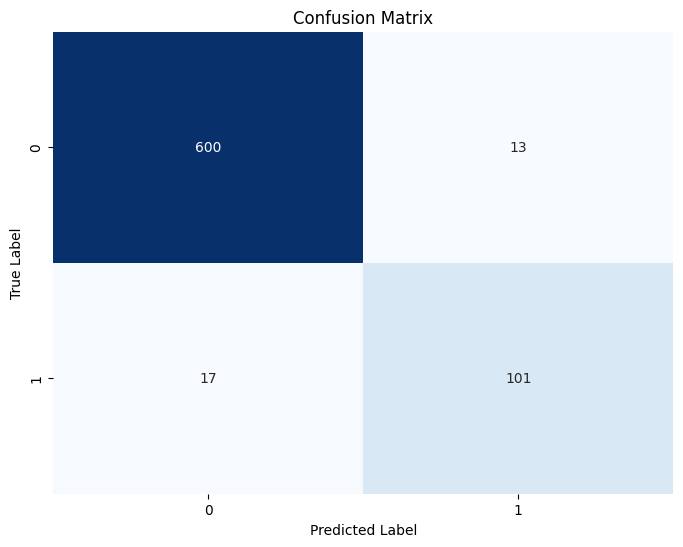

In [137]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred) # Now you can use classification_report
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Support Vector Machine

In [138]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [139]:
y_pred = model.predict(X_test)

Accuracy: 0.9316005471956225

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.96      0.96       613
        True       0.78      0.80      0.79       118

    accuracy                           0.93       731
   macro avg       0.87      0.88      0.87       731
weighted avg       0.93      0.93      0.93       731



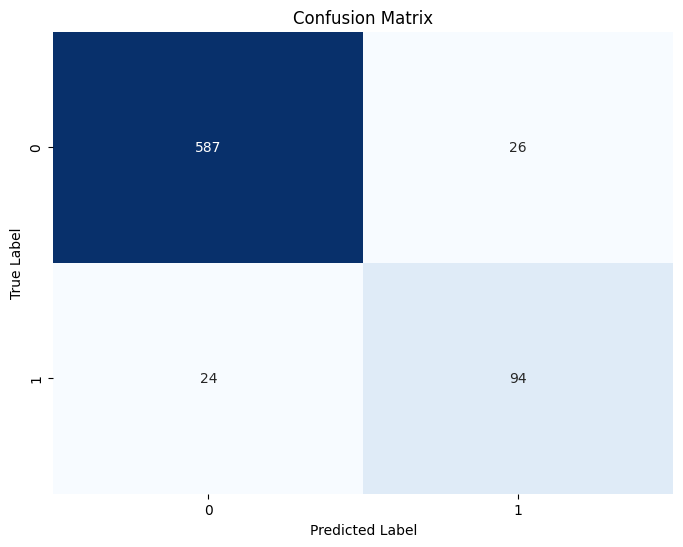

In [140]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# RandomForestClassifier

In [141]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
y_pred = model.predict(X_test)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       613
        True       1.00      1.00      1.00       118

    accuracy                           1.00       731
   macro avg       1.00      1.00      1.00       731
weighted avg       1.00      1.00      1.00       731



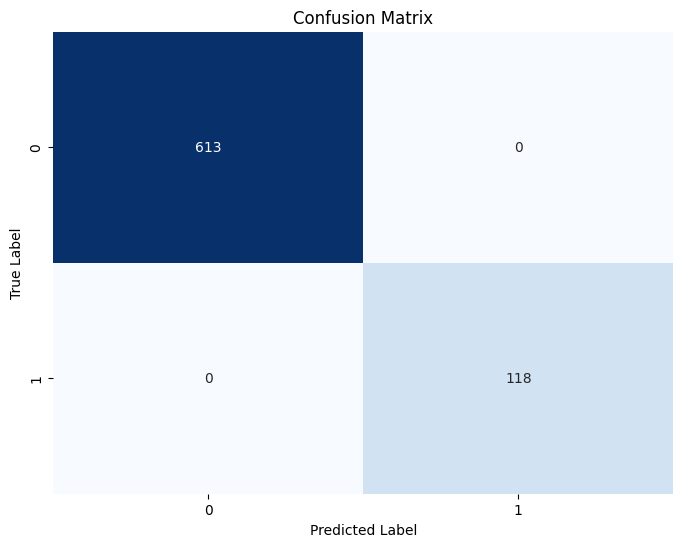

In [143]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#KNeighborsClassifier

In [144]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [145]:
y_pred = model.predict(X_test)

Accuracy: 0.9233926128590971

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.95      0.95       613
        True       0.75      0.78      0.77       118

    accuracy                           0.92       731
   macro avg       0.86      0.87      0.86       731
weighted avg       0.92      0.92      0.92       731



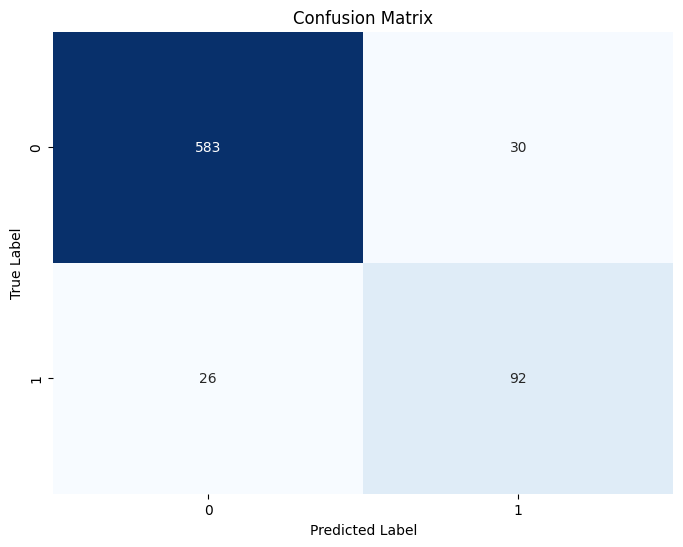

In [146]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#DecisionTreeClassifier

In [147]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [148]:
y_pred = model.predict(X_test)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       613
        True       1.00      1.00      1.00       118

    accuracy                           1.00       731
   macro avg       1.00      1.00      1.00       731
weighted avg       1.00      1.00      1.00       731



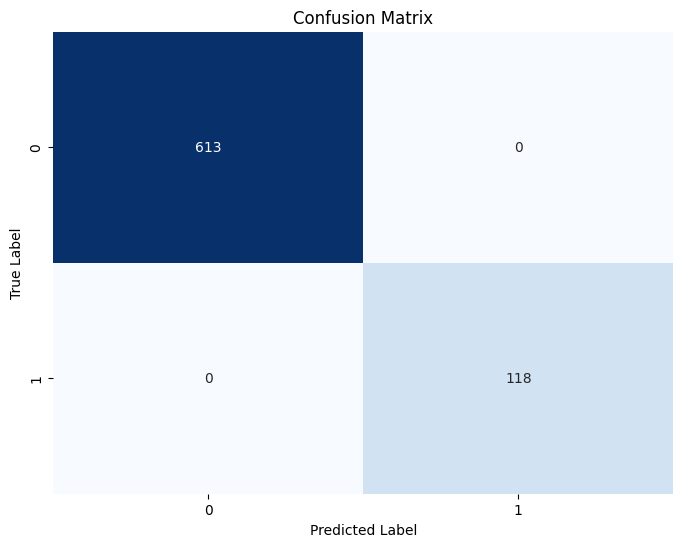

In [149]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Gaussian Naive Bayes

In [150]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [151]:
y_pred = model.predict(X_test)

Accuracy: 0.9288645690834473

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.92      0.96       613
        True       0.69      1.00      0.82       118

    accuracy                           0.93       731
   macro avg       0.85      0.96      0.89       731
weighted avg       0.95      0.93      0.93       731



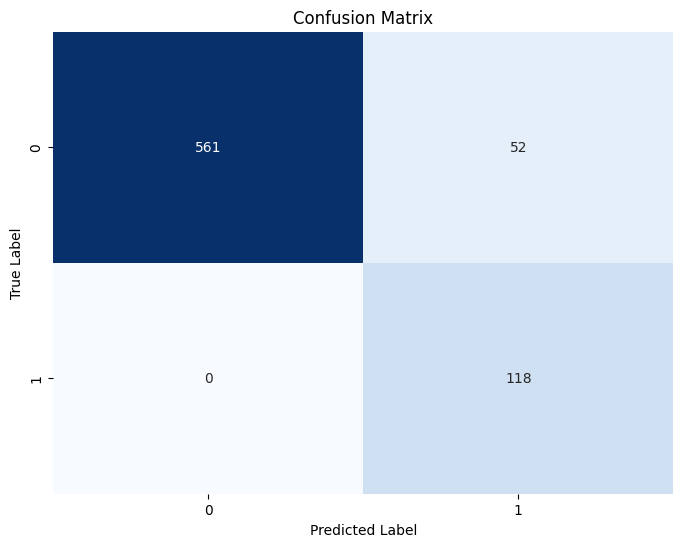

In [152]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

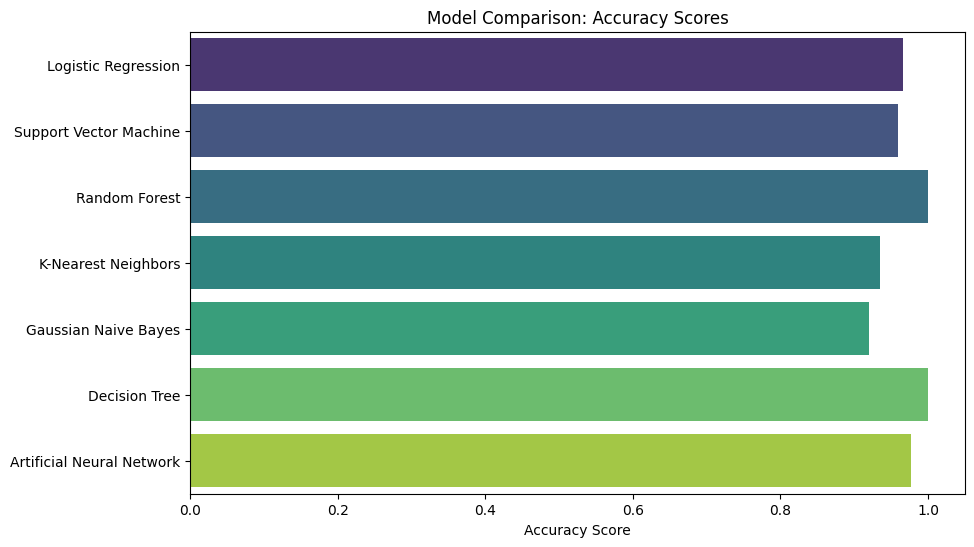

In [153]:
models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Decision Tree', 'Artificial Neural Network']
accuracy_scores = [0.9658, 0.9589, 1.0, 0.9343, 0.9193, 1.0, 0.9767]

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=models, palette='viridis')
plt.xlabel('Accuracy Score')
plt.title('Model Comparison: Accuracy Scores')
plt.show()

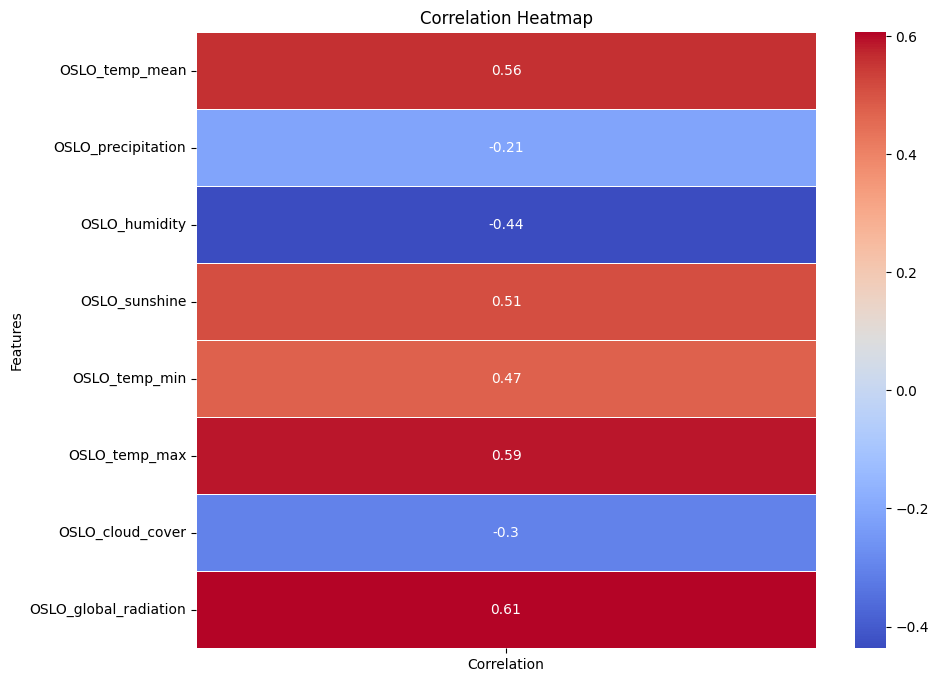

In [154]:
correlations = X.corrwith(y)

corr_df = pd.DataFrame({'Features': correlations.index, 'Correlation': correlations.values})
corr_df = corr_df.set_index('Features')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [155]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_

feature_names = X.columns

indices = np.argsort(importances)[::-1]

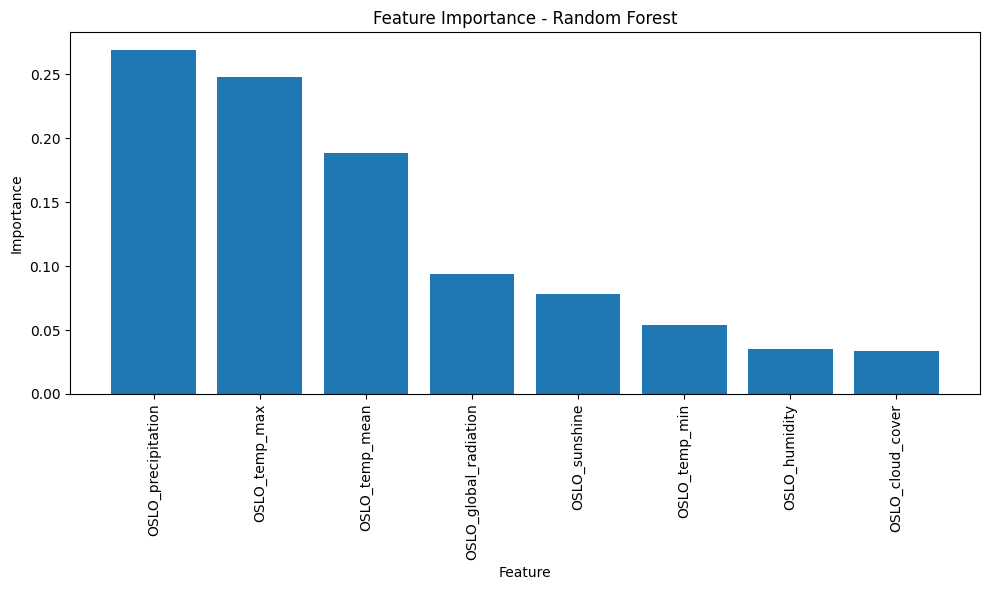

In [156]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [157]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Artificial Neural Network': Sequential([
        Dense(units=100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ])
}

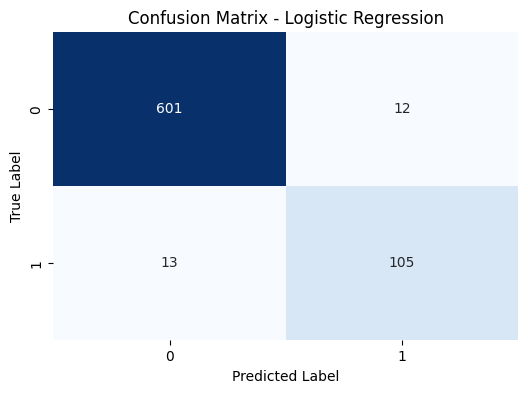

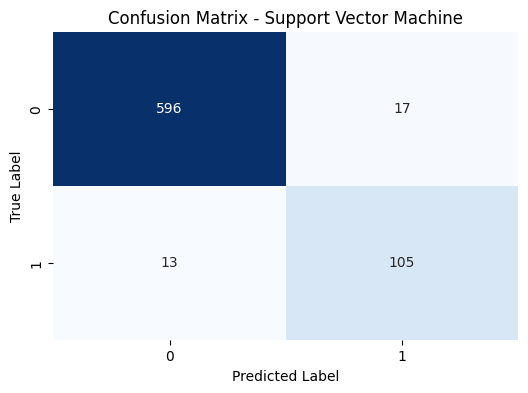

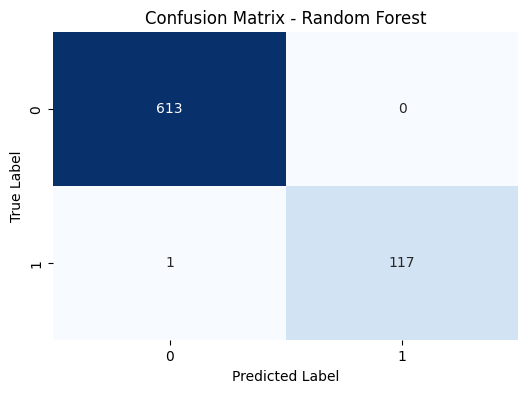

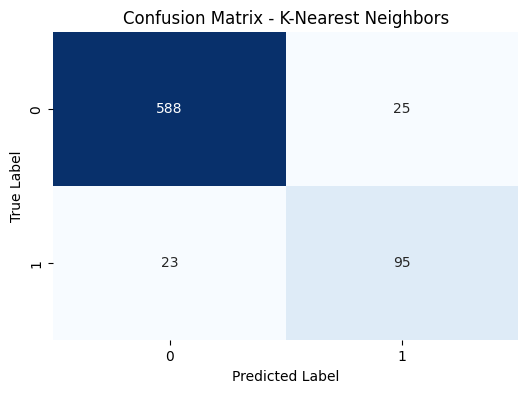

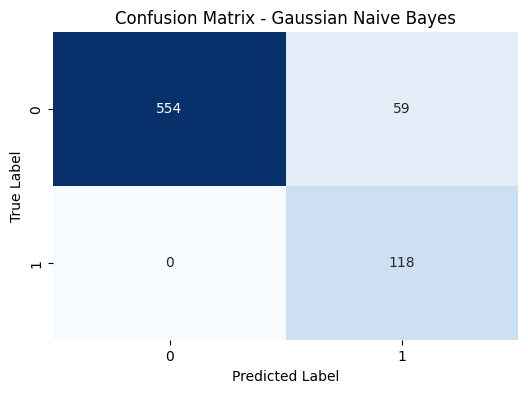

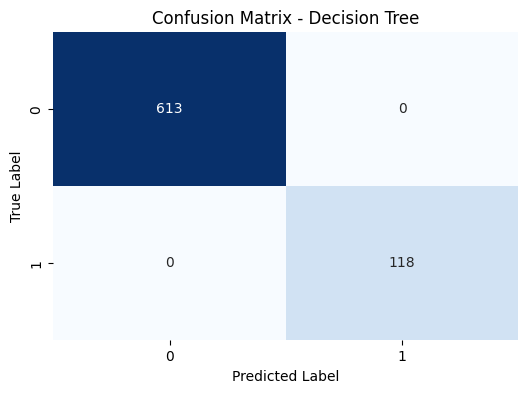

92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8231 - loss: 0.4576
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


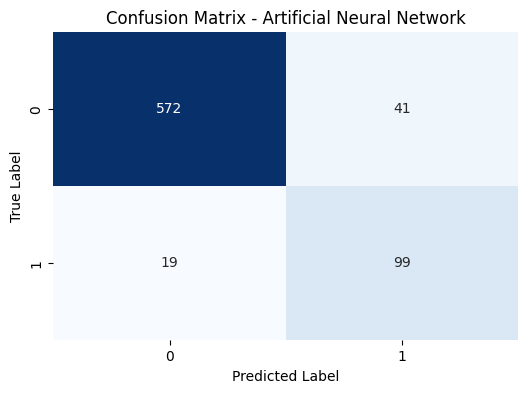

In [158]:

for name, model in models.items():
    if name == 'Artificial Neural Network':

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    if name == 'Artificial Neural Network':
        y_pred = (y_pred > 0.5)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#confusion_matrix

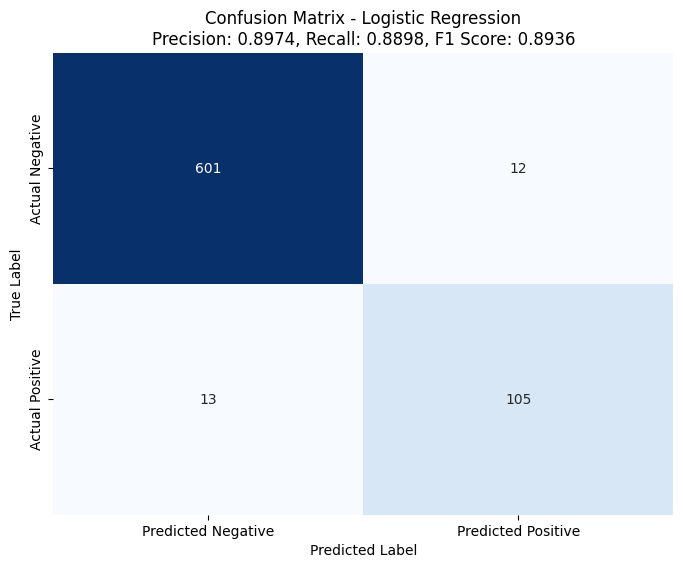

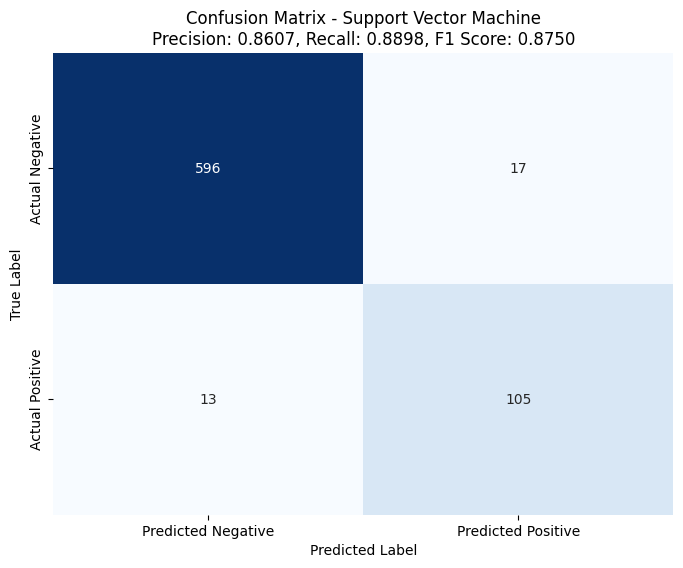

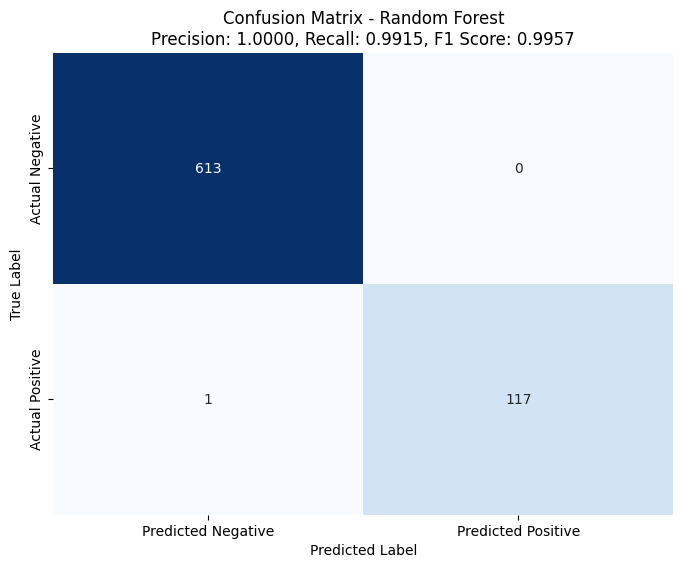

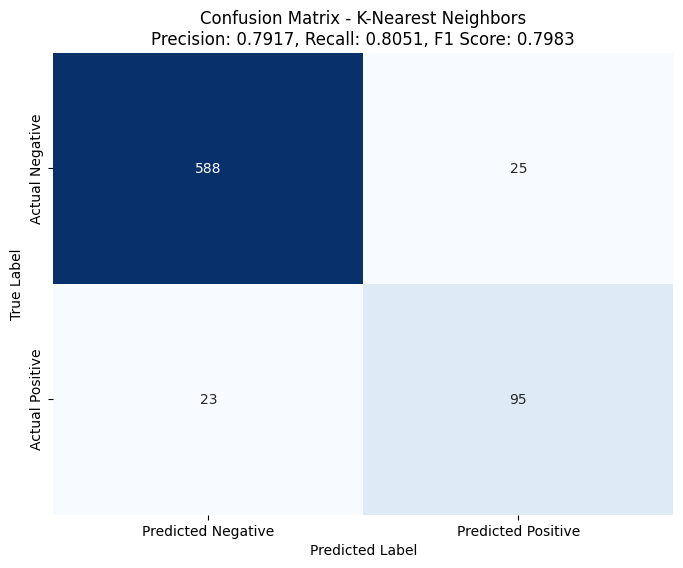

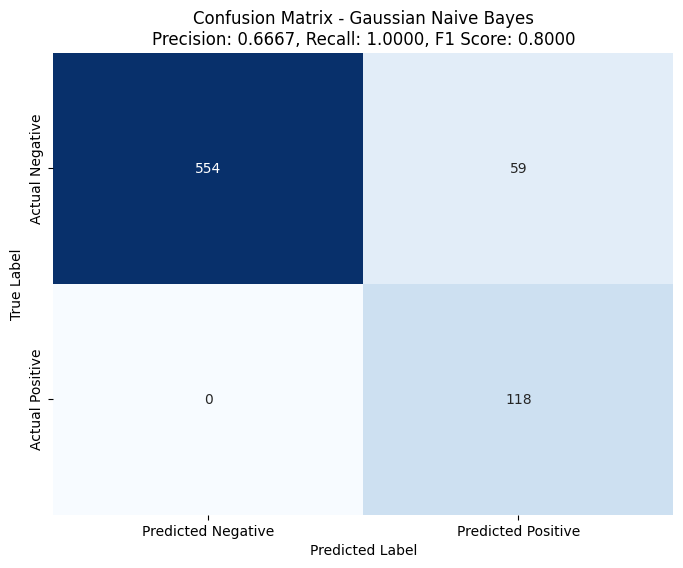

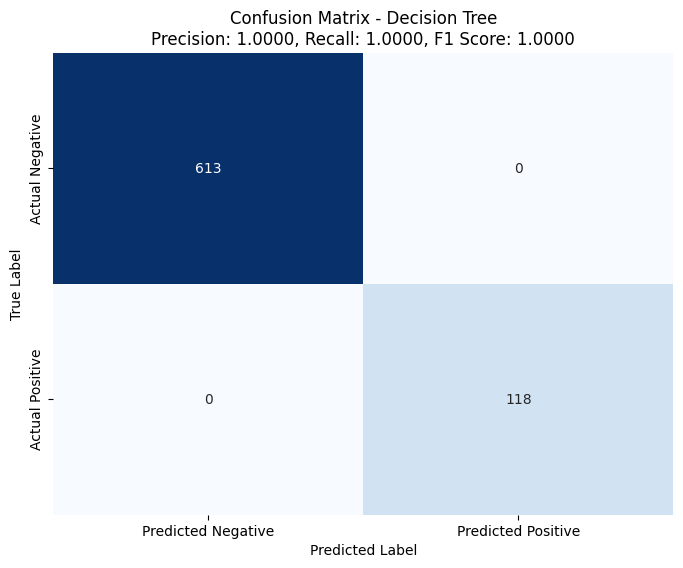

92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9133 - loss: 0.2320
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


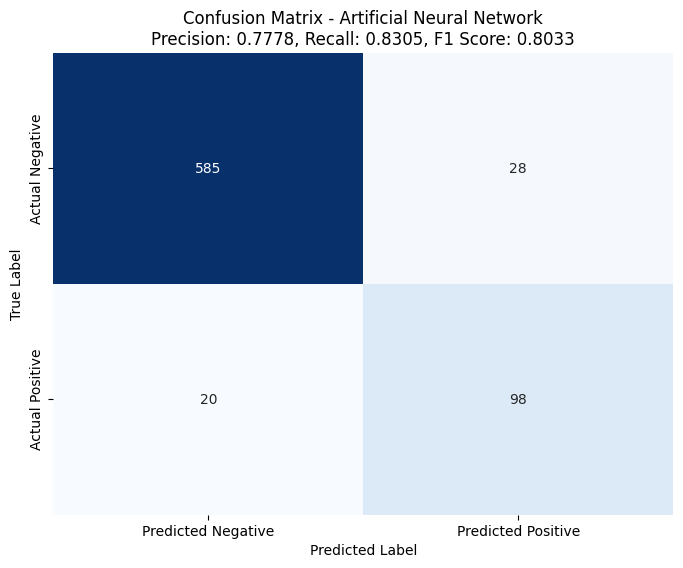

In [159]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

for name, model in models.items():
    if name == 'Artificial Neural Network':

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    if name == 'Artificial Neural Network':
        y_pred = (y_pred > 0.5)

    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {name}\nPrecision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [160]:
print('Model accuracy is: {0:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Model accuracy is: 93.43%


In [161]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

model = Sequential([
    Dense(X_train.shape[1], activation="relu"),
    Dense(int(X_train.shape[1] / 2), activation="relu"),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(
    x=X_train,
    y=y_train,
    epochs=150,
    validation_data=(X_test, y_test),
    verbose=1
)


(2923, 8)
(2923,)
(731, 8)
(731,)
Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8323 - loss: 0.8970 - val_accuracy: 0.8796 - val_loss: 0.3895
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8667 - loss: 0.3674 - val_accuracy: 0.8933 - val_loss: 0.2917
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8985 - loss: 0.2675 - val_accuracy: 0.9124 - val_loss: 0.2342
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9228 - loss: 0.2200 - val_accuracy: 0.9166 - val_loss: 0.2057
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9103 - loss: 0.2047 - val_accuracy: 0.9138 - val_loss: 0.1958
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9200 - loss: 0.1961 - val_accuracy: 0.9166 - val_loss: 0.1923
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9156 - loss: 0.1935 - val_accuracy: 0.9220 - val_loss: 0.1874
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9178 - loss

<Axes: >

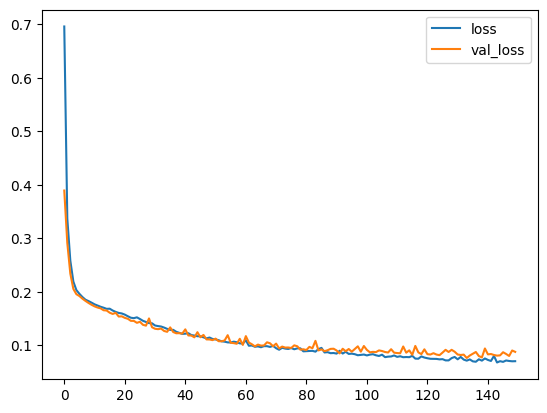

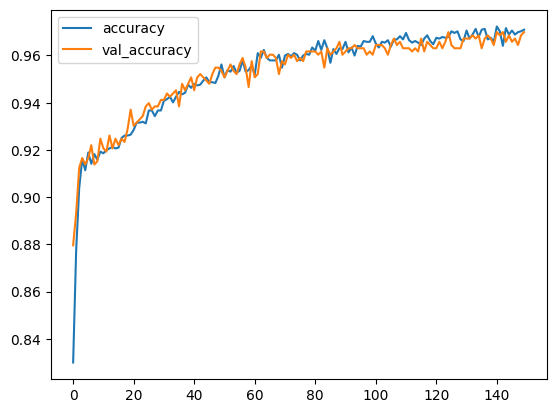

In [162]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

In [163]:
!pip install streamlit


In [164]:
import pickle

# Assuming 'model' is your trained model (e.g., RandomForestClassifier)
with open('weather_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [165]:
# Install joblib
!pip install joblib

# In your Colab notebook:
import joblib
joblib.dump(model, 'weather_prediction_model.joblib')

# In your Streamlit app.py:
import joblib
model = joblib.load('weather_prediction_model.joblib')

In [166]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd

# Load the trained model
with open('weather_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Define the prediction function
def predict_weather(input_data):
    # Convert input data to DataFrame if it's not already
    if not isinstance(input_data, pd.DataFrame):
        input_data = pd.DataFrame(input_data, index=[0])

    prediction = model.predict(input_data)
    return prediction[0]

# Streamlit app UI
st.title("Weather Prediction for BBQ")

# Input fields for features
date = st.number_input("Date (1-31)", min_value=1, max_value=31, value=5)
month = st.number_input("Month (1-12)", min_value=1, max_value=12, value=4)
temp_max = st.number_input("Maximum Temperature (°C)", value=15)
temp_min = st.number_input("Minimum Temperature (°C)", value=5)
wind_speed = st.number_input("Wind Speed (km/h)", value=10)
humidity = st.number_input("Humidity (%)", value=60)
pressure = st.number_input("Pressure (hPa)", value=1010)
cloud_amount = st.number_input("Cloud Amount (%)", value=30)

# Create input data DataFrame
input_data = pd.DataFrame({
    'DATE': [date],
    'MONTH': [month],
    'OSLO_TEMP_MAX': [temp_max],
    'OSLO_TEMP_MIN': [temp_min],
    'OSLO_WIND_SPEED': [wind_speed],
    'OSLO_HUMIDITY': [humidity],
    'OSLO_PRESSURE': [pressure],
    'OSLO_CLOUD_AMOUNT': [cloud_amount]
}, index=[0])

# Make prediction when button is clicked
if st.button("Predict"):
    prediction = predict_weather(input_data)

    # Interpret the prediction
    if prediction == 1:
        st.success("BBQ weather is predicted!")
    else:
        st.error("BBQ weather is not predicted.")

Overwriting app.py


In [167]:
!wget -q -O - ipv4.icanhazip.com

34.125.163.19


In [169]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.163.19:8501

⠴your url is: https://mighty-chicken-sink.loca.lt
  Stopping...
^C
